<h2 style='; font-weight: bold; font-size:150%; color:red'><center> ✏️✏️Flow of the Project : Startup Landscape ✏️✏️</center></h2>  

###  1. Exploratory data analysis (EDA) is one of the most significant methods to examine the data we have. In this project, we are going to explore the hidden patterns in the dataset and extract information from them. 
### 2. Implementing Multiple Linear Regression on the dataset for future predicion.
### 3.  Regularization techniques used to address over-fitting 
### 4. Gradient Descent is an optimization algorithm is used  that minimize a cost function as far as possible.


> - In linear regression, the linearity assumption states that there is a linear relationship between the independent variables (also known as predictors or features) and the dependent variable (also known as the target or response variable). This assumption implies that the relationship between the independent variables and the dependent variable can be described by a straight line.

> - Multiple regression suffers from multicollinearity, autocorrelation, heteroskedasticity.
> -  Linear Regression is very sensitive to Outliers. It can terribly affect the regression line and eventually
the forecasted values.


### work flow of the model :

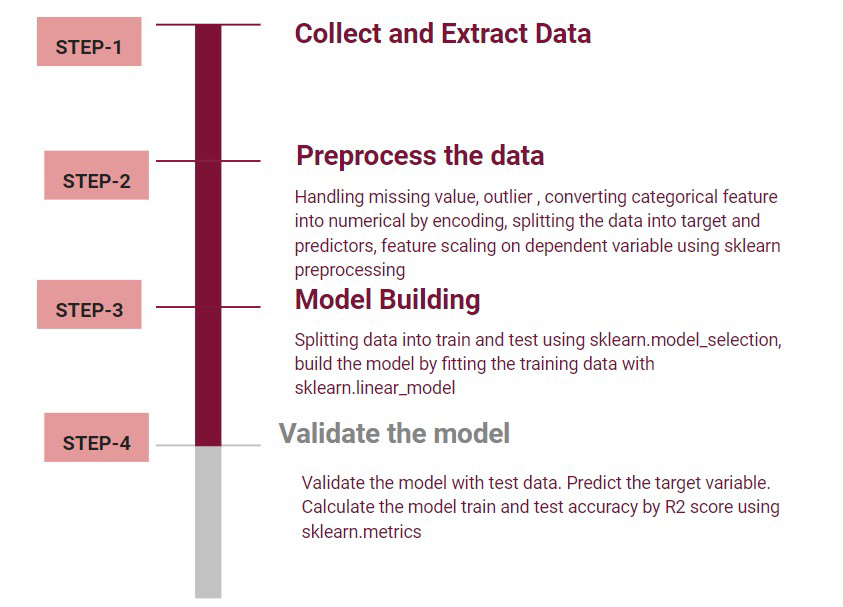


# ==========================================================
# About Dataset
## About
Dataset about 50 Startups' expenditures & profits

## Key Column Description
50 startup dataset with columns


- R&D Spend
- Administration
- Marketing Spend
- State
- Profit


# Importing Neccessary Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
#This applies the default Seaborn style, which includes settings related to colors, fonts, grid lines, and more.
%matplotlib inline 
#To display Matplotlib plots directly within the notebook interface

import warnings
warnings.filterwarnings('ignore')



# Sklearn package used for Machine Learning
> Model : Linear Regression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso, Ridge, ElasticNet,SGDRegressor
from sklearn.metrics import r2_score,mean_absolute_percentage_error, mean_squared_error
from sklearn import metrics

# Loading and Reading Data

In [4]:
df = pd.DataFrame(pd.read_csv('Startup_Landscape.csv'))
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.shape

(50, 5)

# Descriptive Statistics ( Univariate Analysis)

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.describe().T #Transpose

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


# Removing Duplicate Rows

In [9]:
df.drop_duplicates()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
# Remove duplicates

def drop_dup(df):
    if df.duplicated().any() == True:
        print('The total duplicate row before removing duplicate:', df.duplicated().sum())
        df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
        df = df.reset_index(drop=True) #Reset the index
        print('The total duplicate row after removing duplicate:', df.duplicated().sum(), ' \nshape of dataset after removing duplicate columns :',df.shape)
    else:
        return 'No duplicate entries'
drop_dup(df)

'No duplicate entries'

# Checking Null Value

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Exploratory Data Analysis (EDA)📈📊📉

In [12]:
# Count the number of unique values in each column
def check_unquie_count(df):
    unique_counts = df.nunique()
    print(unique_counts)

check_unquie_count(df)

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64


In [13]:
num_not_cat = df.select_dtypes(exclude='object')
num_not_cat.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [14]:
# outlier check on all  independent feature except dependent variable 

outlier_list = df[['R&D Spend', 'Administration', 'Marketing Spend']]
outlier_list

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [15]:
outlier_listC = list(outlier_list.columns)
outlier_listC

['R&D Spend', 'Administration', 'Marketing Spend']

# Outlier Check

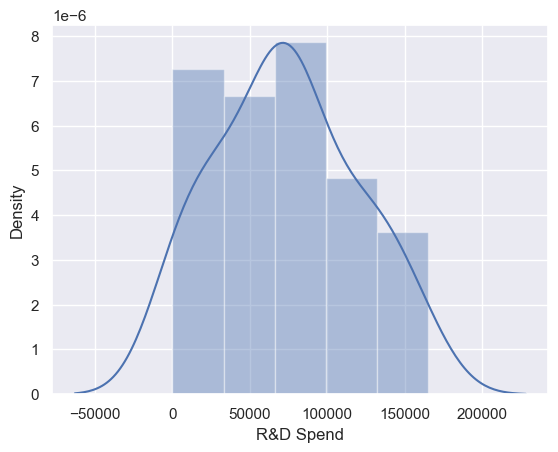

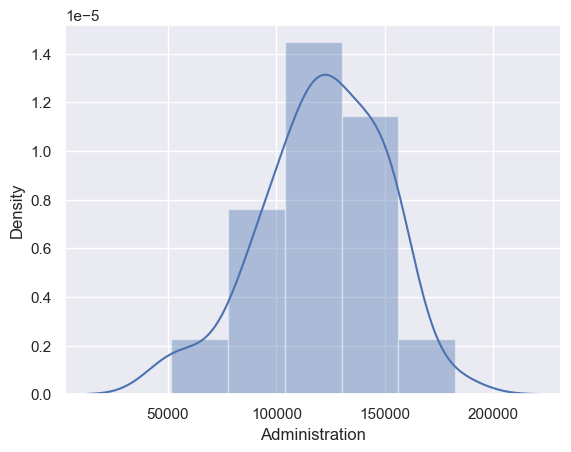

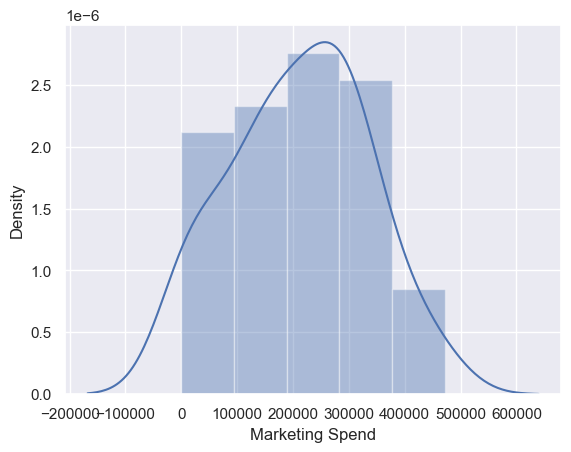

In [16]:
def distplots(df,col):
    sns.distplot(df[col], bins=5, kde=True)
    plt.show()
    
for i in outlier_listC:
    distplots(outlier_list,i)

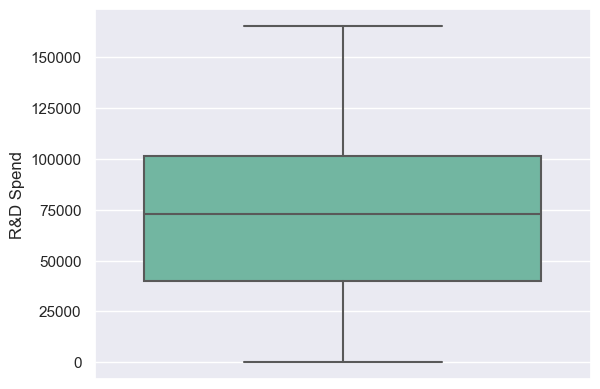

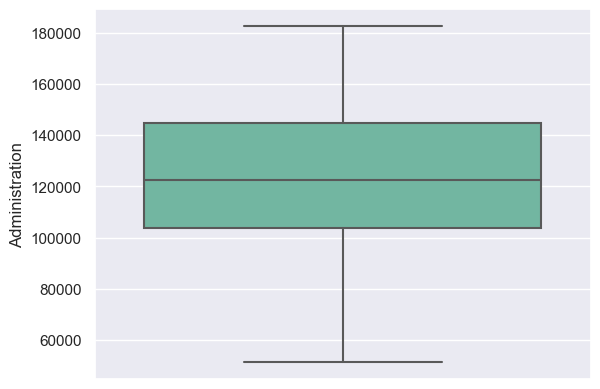

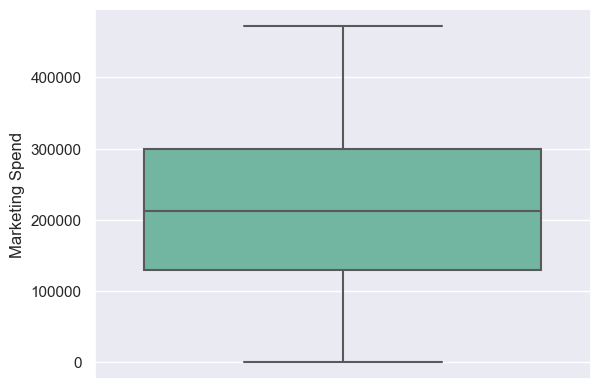

In [17]:
def boxplots(df,col):
    sns.boxplot(y = col, data = df, palette ='Set2' )
    plt.show()

for col in outlier_listC:
        boxplots(df,col)

## Bivariate Analysis

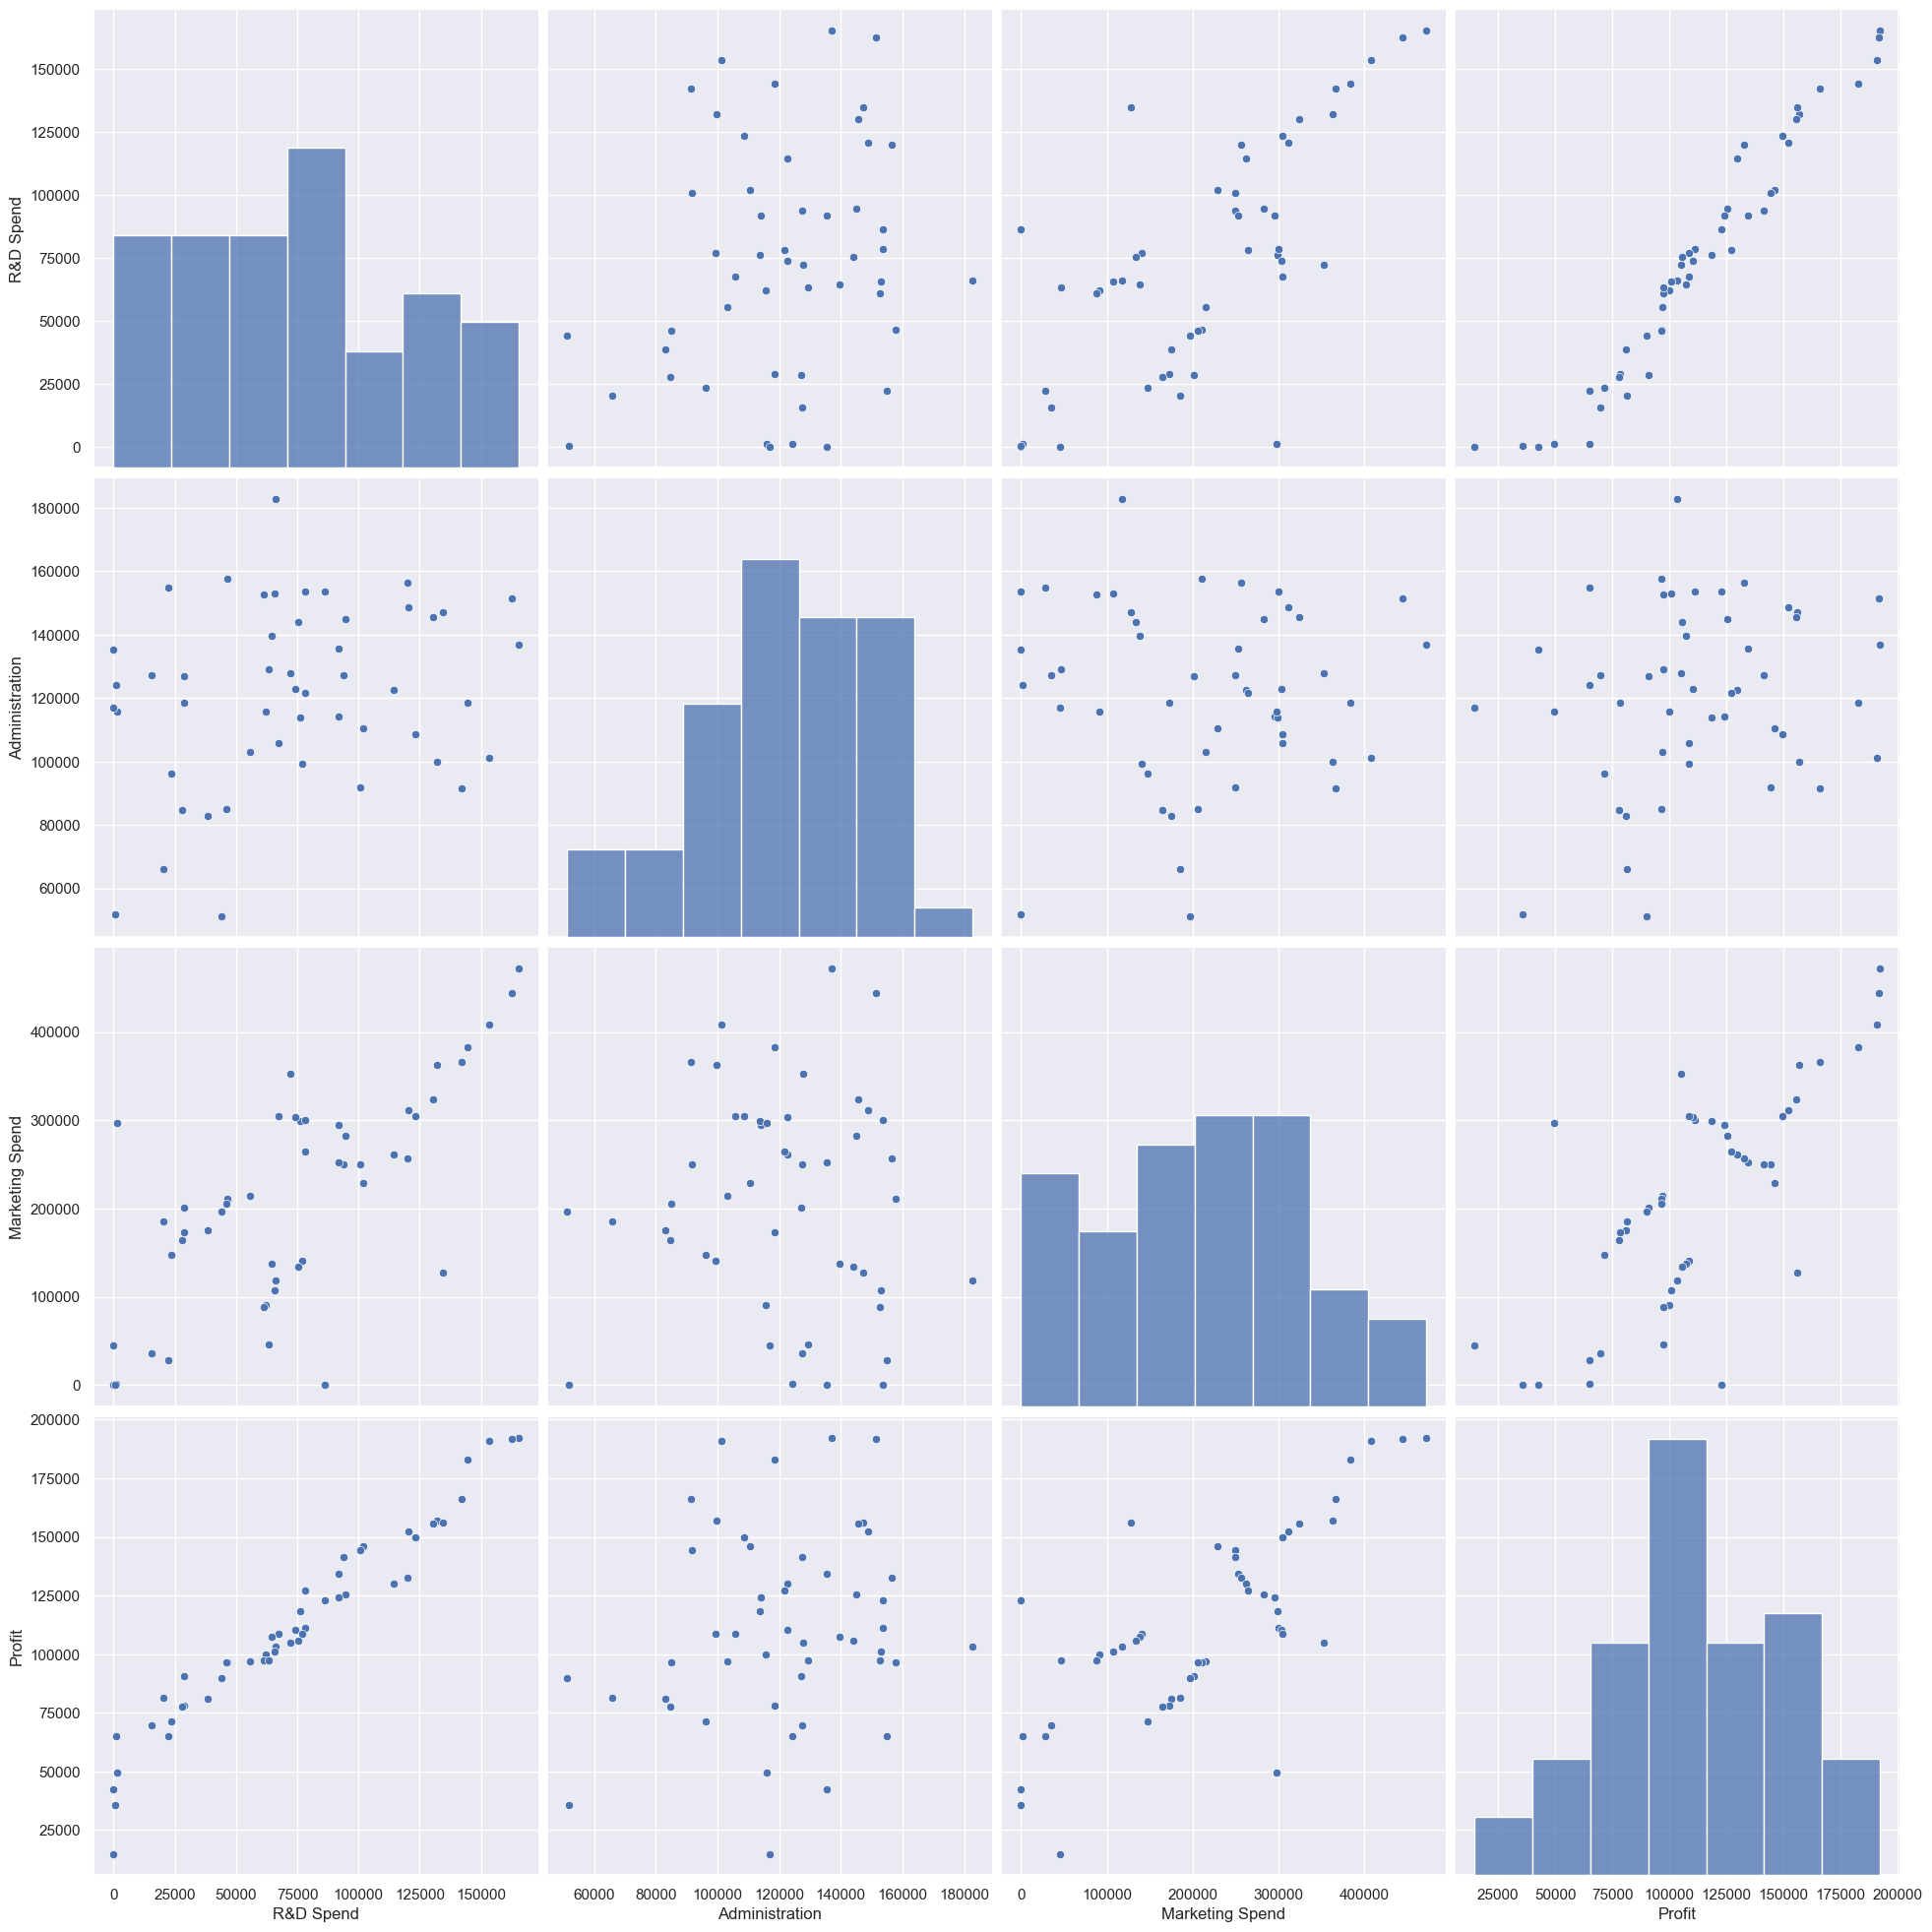

In [18]:
sns.pairplot(df, size = 5, kind = 'scatter') 

<Axes: xlabel='R&D Spend', ylabel='Profit'>

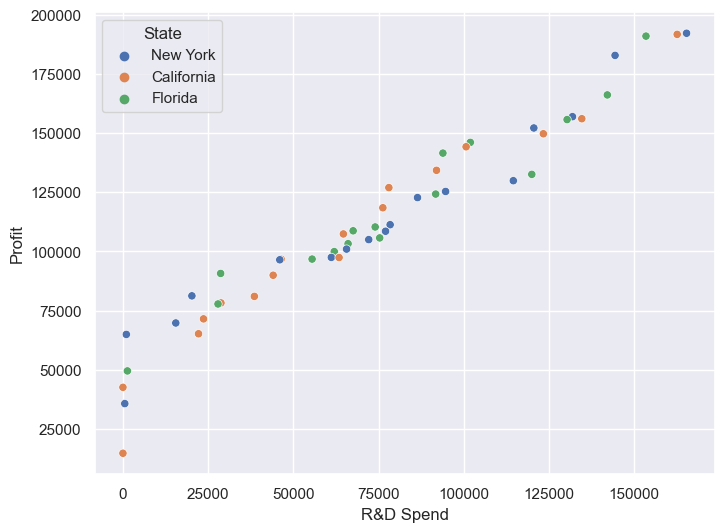

In [19]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['R&D Spend'],y =df['Profit'],hue=df['State'] )

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

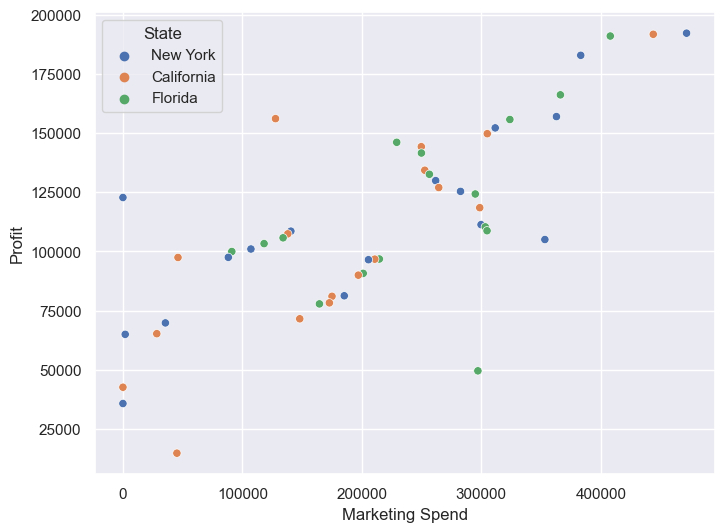

In [19]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['Marketing Spend'],y =df['Profit'],hue=df['State'] )

<Axes: xlabel='Administration', ylabel='Profit'>

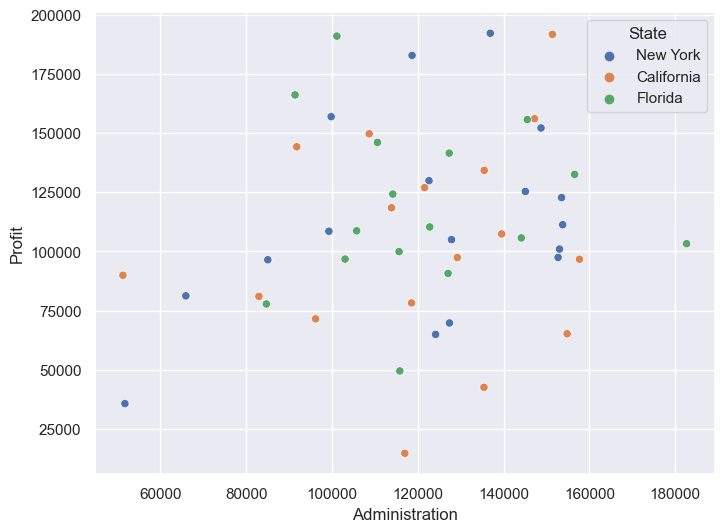

In [20]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['Administration'],y =df['Profit'],hue=df['State'] )

<Axes: xlabel='State', ylabel='count'>

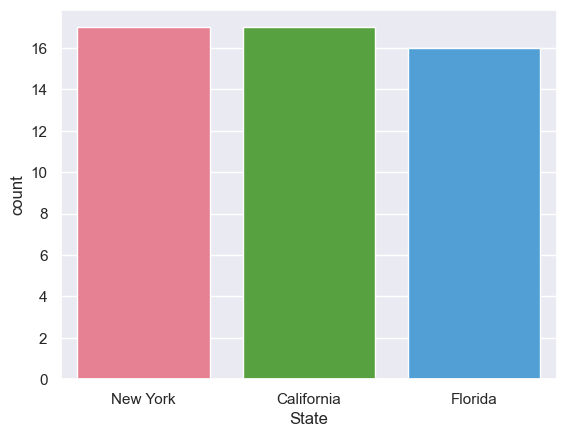

In [21]:
sns.countplot(x = "State", data = df, palette = 'husl', )

# 📈 Preaparation of Data before Training the algorithm


> To train our regression model, the first step is to split up our data into an target(dependent variables) and features (predictors). And we need to do feature selection only on the predictors or independent variable. 

### Step-1: Spliting into dependent and independent variable


In [24]:
list(df)

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

In [25]:
# Assuming 'y' is the column name of the target variable
target = 'Profit'
y = df[[target]]

# Assuming 'X' is the DataFrame containing the feature columns
features = df.drop(target, axis=1)
x = features

In [26]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [27]:
x.shape

(50, 4)

In [28]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step-2: Encoding of categorical feature

> 'State' feature is object type. In principle, the object type data are treated under encoding.

In [29]:
for col in x.columns:
    if x[col].dtypes == 'object' and x[col].nunique() > 2:
        x[col] = x[col].astype('category')
        x = pd.get_dummies(x, columns = [col], drop_first = True)
            
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


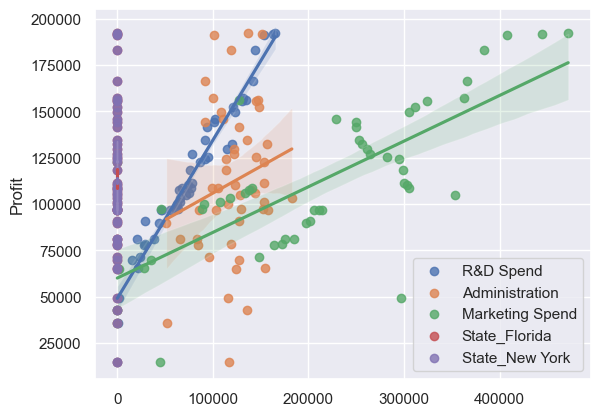

In [30]:
for col in x.columns:
    sns.regplot(x=x[col], y=y, label = col)
    plt.xlabel('')
    plt.legend()

### step -3: Feature Scaling
- Feature scaling is done only on dependent variables. So we need to split the data into target and dependent variable.

In [31]:
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x = pd.DataFrame(sc_x,columns=sc.get_feature_names_out())

In [32]:
sc_x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,2.016411,0.560753,2.153943,-0.685994,1.393261
1,1.955860,1.082807,1.923600,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.457738,-0.717741


In [33]:
sc_x.max()

R&D Spend          2.016411
Administration     2.210141
Marketing Spend    2.153943
State_Florida      1.457738
State_New York     1.393261
dtype: float64

In [34]:
list(x)

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'State_Florida',
 'State_New York']

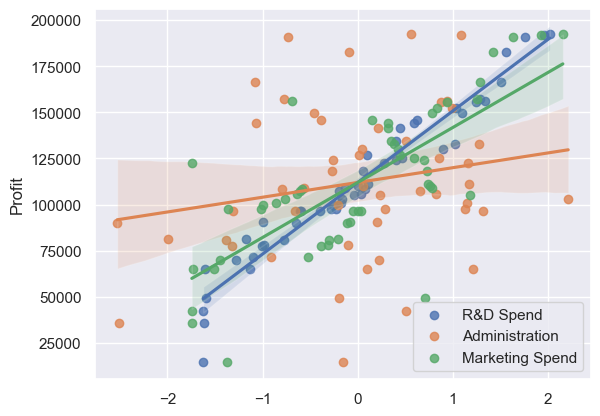

In [35]:
sns.regplot(x=sc_x["R&D Spend"], y=y, label='R&D Spend',)
sns.regplot(x=sc_x["Administration"], y=y, label='Administration',)  
sns.regplot(x=sc_x["Marketing Spend"], y=y, label='Marketing Spend',) 
plt.xlabel('')
plt.legend()
plt.show()

### step -4: Multi-collinearity check
> There should be no or little multicollinearity present for the model building

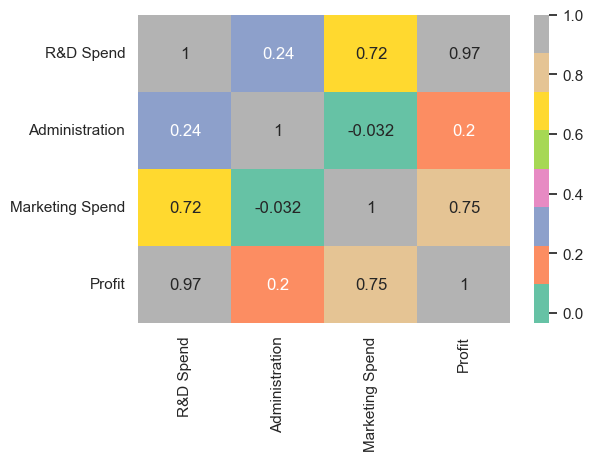

In [36]:
# Finding correlation
plt.figure(figsize=(6,4))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()

### VIF (Multi-collinearity Check)

Multicollinearity refers to a situation in regression analysis where there is a high correlation between two or more predictor variables (also known as independent variables or features). It occurs when the predictor variables in a regression model are highly linearly related to each other, making it difficult to distinguish the individual effects of each variable on the dependent variable.

In the presence of multicollinearity, it becomes challenging to determine the true relationship between the predictor variables and the target variable. This is because multicollinearity can lead to unstable and unreliable estimates of the regression coefficients.


Identifying multicollinearity: Common methods to detect multicollinearity include calculating correlation matrices, variance inflation factors (VIF> 5).

Dealing with multicollinearity: If multicollinearity is detected , several strategies can be employed, 

- Dropping one or more correlated variables from the model.
(incase more than 1 features have VIF > 5, drop highest and need to perform VIF check again.

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = sc_x
data = {'VIF' : [variance_inflation_factor(variable, i ) for i in range(len(sc_x.columns))],
        'Features' : x.columns}
     
vif = pd.DataFrame(data)

In [38]:
vif

,VIF,Features
0,2.495511,R&D Spend
1,1.177766,Administration
2,2.416797,Marketing Spend
3,1.387641,State_Florida
4,1.335061,State_New York


- for VIF > 5 refers to multicollinearity. For linear regression model building we need no or little  multicollinearity. We need to drop the features, as we don't need multi-collinearity


## step-5: Split the data for building the model and  prediction


## **CASE- I : Test size = 0.3 **
Split the data (70% Train and 30% Test)

In [37]:
# Split the data into training and test for building the model and for prediction
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=121)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(35, 5) (15, 5) (35, 1) (15, 1)


## Approach no - 1 : Multiple LINEAR REGRESSION 📈📉



# Multiple linear equation ;
### $\hat{y}= y + \varepsilon$
### $\hat{y}= \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \ldots + \beta_n \cdot x_n + \varepsilon$
### $\hat{y} = \beta_0 +\Sigma_1^i\beta_i \cdot x_i + \varepsilon$
> where $\beta_0$ is intercept and $\beta_i$'s are slopes and $\varepsilon$ is error.

- $Response = (Constant + Slope * Predictors) + Error $
- y is the Response, $x_i$'s are the Predictors
- The difference between the actual value and the model's estimate a residual (error).
- These residuals will play a significant role in judging the usefulness of a model.
- If the residuals are small, it implies that the model is a good estimator.

##  Performance Matrix


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

## $R^2$ Score




# \begin{equation*} 
R^2 = 1 - \frac{SSR}{TSS} = 1 - \frac{\sum_i (y_i -\hat{y}_i)^2}{\sum_i (y_i-\bar{y})^2}
\end{equation*}

- > TSS : Total Sum of Square = $\Sigma_i (Actual)_i -(Mean Actual)$ = $\sum_i (y_i -\bar{y})^2$
- > SSR : Sum of Square residual 
> =$(Residual)^2$
> =$(Actual -Predicted)^2$
> =$\sum_i (y_i -\hat{y}_i)^2$

## Adjusted $R^2$

# $R^2_{adj} = 1- \frac{(1-R^2)(N-1)}{(N-p-1)}$

> - N  = Total sample size 
> - p = Number of predictors ( No. of Independent variable)

### # Training

In [38]:
# Tain the model with LR model
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [39]:
# find the slopes and intercept from the trained model
intercept =LR.intercept_
slope =LR.coef_

print('The intercept for our linear model is :',intercept.round(3))
print()
print('The coefficients are :',slope.round(3))

The intercept for our linear model is : [51340.482]

The coefficients are : [[ 8.480000e-01 -1.900000e-02  1.800000e-02 -4.389268e+03 -7.453231e+03]]


In [40]:
slope.shape

(1, 5)

In [41]:
#Reshaping of the slope is required from (1.5) to (5,1)
slope = slope.reshape(5,1)
print(slope.shape)

(5, 1)


In [42]:
Lr_data = {'Slope': slope,'Features' : x.columns}
coeff_df = pd.DataFrame(slope, columns=['Slope'], index =x.columns)
coeff_df

,Slope
R&D Spend,0.848180
Administration,-0.019409
Marketing Spend,0.018301
State_Florida,-4389.268039
State_New York,-7453.231161


### # Prediction of target variable using Linear Regression model

In [43]:
#Training Prediction
y_pred_train = LR.predict(x_train)
err_train = y_train - y_pred_train
Train_r2 = r2_score(y_train, y_pred_train)

#Test Prediction
y_pred_test = LR.predict(x_test)
err_test = y_test - y_pred_test
Test_r2 = r2_score(y_test, y_pred_test)
print ('Train R2 score :', Train_r2.round(3),'\n' 'Test R2 Score   :', Test_r2.round(3))

Train R2 score : 0.966 
Test R2 Score   : 0.899


In [44]:
err_train.skew()

Profit   -0.306667
dtype: float64

In [45]:
err_train.kurtosis()

Profit    0.42166
dtype: float64

The skewness and kurtosis which are very small values, close to zero.

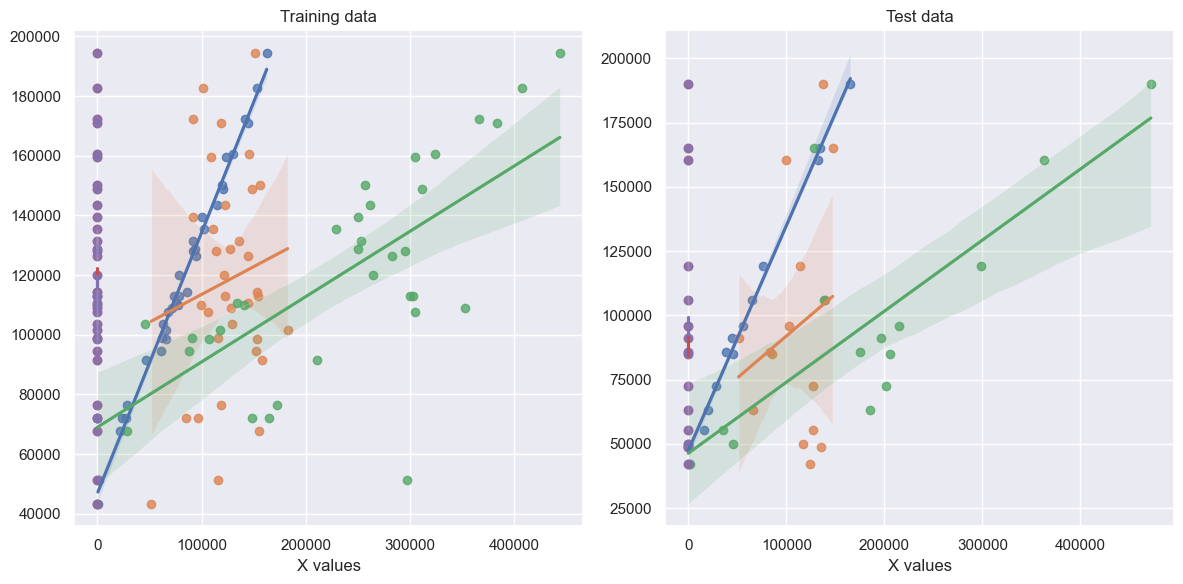

In [46]:
# Here we will loop through each feature and create a regression plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot regression for training data
for i in range(len(x_train.columns)):
    sns.regplot(x=x_train.iloc[:,i ], y=y_pred_train, ax=ax1, )
    ax1.set_title('Training data')
    ax1.set_xlabel('X values')


# Plot regression for test data
for i in range(len(x_test.columns)):
    sns.regplot(x=x_test.iloc[:, i], y=y_pred_test, ax=ax2)
    ax2.set_title('Test data')
    ax2.set_xlabel('X values')

# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

In [47]:
# mse, rmse, mape, accuracy, using formatted string literals

MSE = mean_squared_error(y_test,y_pred_test)
print(f'1. mean squared error (MSE) = ',MSE)
RMSE = np.sqrt(MSE)
print(f'2. root mean squared error (RMSE) = {RMSE}')
MAPE = mean_absolute_percentage_error(y_test,y_pred_test)
print(f'3. mean absolute percentage error (MAPE) = {MAPE}')
ACC = 100-MAPE*100
print(f'4. accuracy of the model = {ACC}')

1. mean squared error (MSE) =  194052164.5282838
2. root mean squared error (RMSE) = 13930.260748754268
3. mean absolute percentage error (MAPE) = 0.2554893987122949
4. accuracy of the model = 74.45106012877051


## Approach no 2 : Ordinary Least Square (OLS) Method

In [48]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [49]:
# With Train Data

reg_model = smf.OLS(endog = y_train, exog=x_train).fit()   # with unscaled data
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              697.3
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                    4.49e-30
Time:                        11:49:39   Log-Likelihood:                         -376.71
No. Observations:                  35   AIC:                                      763.4
Df Residuals:                      30   BIC:                                      771.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.8223      0.072     11.399      0.000       0.675       0.970
Administration      0.2958      0.041      7.248      0.000       0.212       0.379
Marketing Spend     0.0537      0.024      2.227      0.034       0.004       0.103
State_Florida    1531.1852   5006.503      0.306      0.762   -8693.459    1.18e+04
State_New York  -2031.3811   5318.593     -0.382      0.705   -1.29e+04    8830.634
==============================================================================
Omnibus:                        0.362   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.447
Skew:                          -0.216   Prob(JB):                        0.800
Kurtosis:                       2.652   Cond. No.                     8.87e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# With test data

reg_model = smf.OLS(endog = y_test, exog=x_test).fit()   # with unscaled data
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              135.7
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                    7.45e-09
Time:                        11:49:39   Log-Likelihood:                         -163.21
No. Observations:                  15   AIC:                                      336.4
Df Residuals:                      10   BIC:                                      340.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.5925      0.148      4.006      0.002       0.263       0.922
Administration      0.3408      0.063      5.416      0.000       0.201       0.481
Marketing Spend     0.1108      0.054      2.037      0.069      -0.010       0.232
State_Florida    6572.5635    1.4e+04      0.471      0.648   -2.45e+04    3.77e+04
State_New York   1.313e+04   9203.882      1.426      0.184   -7379.021    3.36e+04
==============================================================================
Omnibus:                        3.862   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                1.643
Skew:                          -0.739   Prob(JB):                        0.440
Kurtosis:                       3.666   Cond. No.                     8.90e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

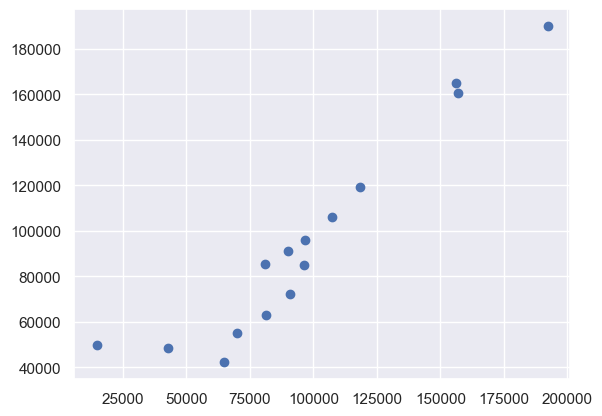

In [51]:
# Check linearity

plt.scatter(y_test, y_pred_test)

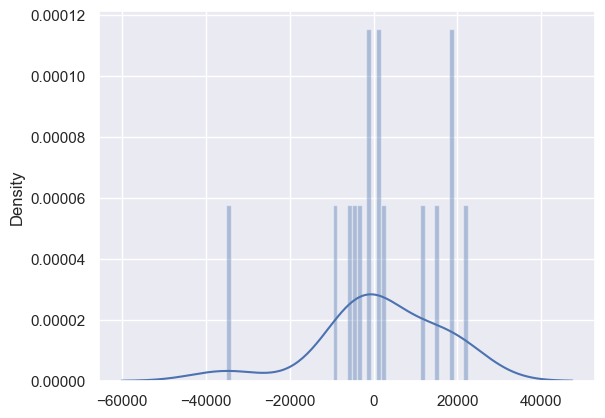

In [52]:
# Normality of Residual

sns.distplot((y_test - y_pred_test), bins=50)
plt.show()

### Assumption of LR Model is satisfied

#### 1) Linearity - Satisfied
#### 2) Normality of Residuals- Satisfied
#### 3) Homoscedasticity - Satisfied (there is no outlier and residual is normaly distributed)
#### 4) No autocorrelation - Satisfied [Durbin-Watson values are in the vicinity of the value 2 : If the value are between 1.5-2.5, Autocorrelation is likely not present]
#### 5) No or little Multicollinearity - satisfied


 ## In order to create less complex model when you have a large number of features in your dataset, some of the Regularization techniques used to address over-fitting and feature selection are:

# Lasso (L1 reguralization):


In [53]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print("Lasso Model :", (lasso.coef_))
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)
print("Training Accuracy :", r2_score(y_train, y_pred_train_lasso))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_lasso))

Lasso Model : [ 8.48178345e-01 -1.94080389e-02  1.83015495e-02 -4.38830220e+03
 -7.45219794e+03]
Training Accuracy : 0.9659473641394303

Test Accuracy : 0.8990845550347444


# Ridge (L2 Regularization):

> Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,


> Ridge regression is an L2 penalized model. Adds the squared sum of the weights to the least-squares cost function.
***

In [54]:
# closer to zero but not exact zero
# penalty - 0.3

ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge Model :", (ridge.coef_))
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)
print("Training Accuracy :", r2_score(y_train, y_pred_train_ridge))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_ridge))

Ridge Model : [[ 8.47289948e-01 -1.92483465e-02  1.84518224e-02 -3.97187125e+03
  -6.92823081e+03]]
Training Accuracy : 0.9659129180457099

Test Accuracy : 0.9014293879454559


# ElasticNet

Elastic Net regularization combines both L1 and L2 regularization, allowing for a balance between feature selection and coefficient shrinkage. It aims to address some of the limitations of Ridge and Lasso by incorporating both L1 and L2 regularization terms into the loss function. This makes Elastic Net useful for situations where you have high-dimensional data with potential multicollinearity and where you want to perform feature selection and prevent overfitting simultaneously. The parameters $\lambda_1$ and  $\lambda_2$  control the strengths of the respective regularization terms.



In [55]:
# Definitions :

# alpha: This parameter controls the overall regularization strength. It's a non-negative value that determines how much regularization is applied to the model. A higher value of alpha leads to stronger regularization, which can help prevent overfitting.

# l1_ratio: This parameter determines the mix between L1 (Lasso) and L2 (Ridge) regularization. It's a value between 0 and 1. When l1_ratio is 0, the model becomes Ridge regression, and when it's 1, the model becomes Lasso regression. A value between 0 and 1 results in a combination of L1 and L2 regularization, which is the core feature of Elastic Net.

elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(x_train, y_train)
y_pred_train_elastic = elastic.predict(x_train)
y_pred_test_elastic = elastic.predict(x_test)
print("Training Accuracy :", r2_score(y_train, y_pred_train_elastic))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_elastic))

Training Accuracy : 0.9628934095086855

Test Accuracy : 0.9189117263704607


# Gradient Descent
> Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.


In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.3, random_state=101)
print('x_train shape :',x_train.shape,'\n''x_test shape :', x_test.shape,'\n' 'y_train shape :',y_train.shape,'\n''y_test shape :', y_test.shape)
print()
gd = SGDRegressor() #Stochastic Gradient Descent
gd.fit(x_train, y_train)
y_pred_gd_train = gd.predict(x_train)
y_pred_gd_test = gd.predict(x_test)
Train_accuracy_gd =r2_score(y_train, y_pred_gd_train)
Test_accuracy_gd = r2_score(y_test, y_pred_gd_test)

print("GD Trainging Accuracy :", Train_accuracy_gd  )
print("GD Test Accuracy      :",Test_accuracy_gd  )

x_train shape : (35, 5) 
x_test shape : (15, 5) 
y_train shape : (35, 1) 
y_test shape : (15, 1)

GD Trainging Accuracy : 0.9517431192211134
GD Test Accuracy      : 0.9235586172977267


In [57]:
# Conclusion : Till now, we see that Gradient Descent has given the best results.

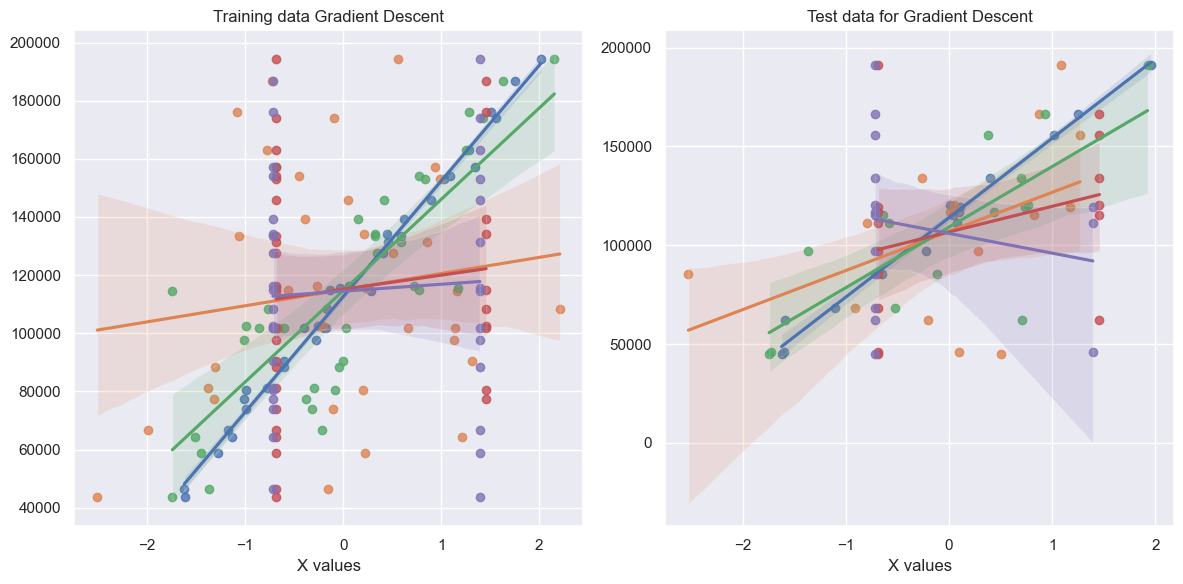

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot regression for training data
for i in range(len(x_train.columns)):
    sns.regplot(x=x_train.iloc[:,i ], y=y_pred_gd_train, ax=ax1, )
    ax1.set_title('Training data Gradient Descent')
    ax1.set_xlabel('X values')


# Plot regression for test data
for i in range(len(x_test.columns)):
    sns.regplot(x=x_test.iloc[:, i], y=y_pred_gd_test, ax=ax2)
    ax2.set_title('Test data for Gradient Descent')
    ax2.set_xlabel('X values')

# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

<Axes: xlabel='Profit'>

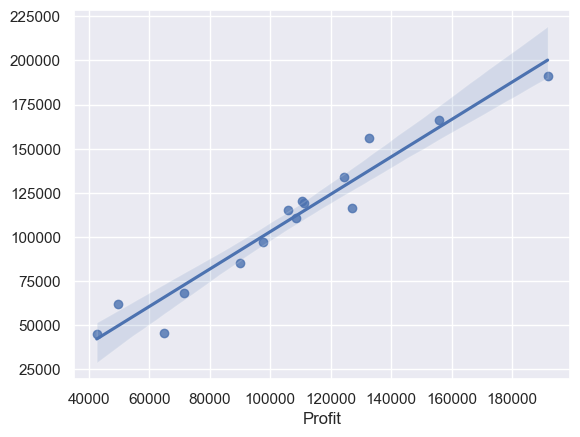

In [59]:
sns.regplot(x=y_test, y=y_pred_gd_test)

## **CASE- 2 : Test size = 0.2 **

Split the data (80% Train and 20% Test)

In [60]:
#Split the data into training and test for building the model and for prediction
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=121)

print('x_train shape :',x_train.shape,'\n''x_test shape :', x_test.shape,'\n' 'y_train shape :',y_train.shape,'\n''y_test shape :', y_test.shape)

y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)


# Validate the actual vs predicted
Test_accuracy = r2_score(y_test, y_pred_test)
Train_accuracy = r2_score(y_train, y_pred_train)

print ('Train accuracy :', Train_accuracy,'\n' 'Test accracy   :', Test_accuracy)


# MSE, RMSE, MAPE
MSE = mean_squared_error(y_test,y_pred_test)
print(f'1. mean squared error (MSE) = ',MSE)
RMSE = np.sqrt(MSE)
print(f'2. root mean squared error (RMSE) = {RMSE}')
MAPE = mean_absolute_percentage_error(y_test,y_pred_test)
print(f'3. mean absolute percentage error (MAPE) = {MAPE}')
ACC = 100-MAPE*100
print(f'4. accuracy of the model = {ACC}')

x_train shape : (40, 5) 
x_test shape : (10, 5) 
y_train shape : (40, 1) 
y_test shape : (10, 1)
Train accuracy : 0.9328286436776771 
Test accracy   : 0.9830641471002153
1. mean squared error (MSE) =  29104086.610129923
2. root mean squared error (RMSE) = 5394.820350125658
3. mean absolute percentage error (MAPE) = 0.045422492745438366
4. accuracy of the model = 95.45775072545617


In [61]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()   # with unscaled data
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              542.6
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                    4.13e-32
Time:                        11:49:44   Log-Likelihood:                         -436.75
No. Observations:                  40   AIC:                                      883.5
Df Residuals:                      35   BIC:                                      891.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7507      0.076      9.901      0.000       0.597       0.905
Administration      0.2914      0.042      6.869      0.000       0.205       0.378
Marketing Spend     0.0670      0.027      2.504      0.017       0.013       0.121
State_Florida    5809.5624   5595.183      1.038      0.306   -5549.263    1.72e+04
State_New York   7200.3710   5504.299      1.308      0.199   -3973.951    1.84e+04
==============================================================================
Omnibus:                        2.080   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.383
Skew:                          -0.194   Prob(JB):                        0.501
Kurtosis:                       2.176   Cond. No.                     8.38e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

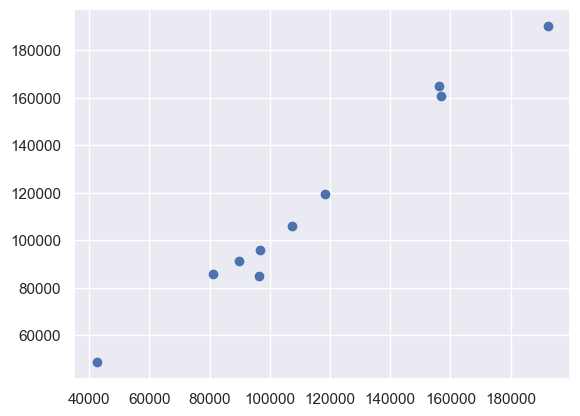

In [62]:
# Check linearity

plt.scatter(y_test, y_pred_test)

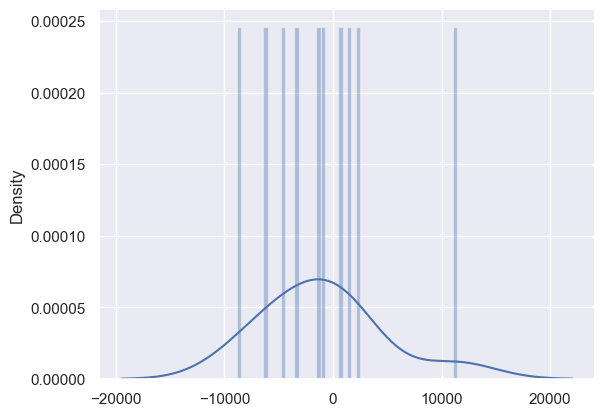

In [63]:
# Normality of Residual

sns.distplot((y_test - y_pred_test), bins=50)
plt.show()

#### 1) Linearity - Satisfied
#### 2) Normality of Residuals- Satisfied
#### 3) Homoscedasticity - Satisfied (there is no outlier and residual is normaly distributed, no variance in residual)
#### 4) No autocorrelation - Satisfied
#### 5) No or little Multicollinearity - satisfied


P-values and coefficients in regression analysis work together to tell which relationships in the model
are statistically significant and the nature of those relationships.
- The coefficients describe the mathematical relationship between each independent variable and the
dependent variable.
- The p-values for the coefficients indicate whether these relationships are statistically significant.

In [64]:
reg_model = smf.OLS(endog = y_test, exog=x_test).fit()   # with unscaled data
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              155.2
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                    1.77e-05
Time:                        11:49:45   Log-Likelihood:                         -105.98
No. Observations:                  10   AIC:                                      222.0
Df Residuals:                       5   BIC:                                      223.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.5605      0.150      3.735      0.014       0.175       0.946
Administration      0.3750      0.081      4.608      0.006       0.166       0.584
Marketing Spend     0.1350      0.055      2.433      0.059      -0.008       0.278
State_Florida   -1943.7666   1.54e+04     -0.127      0.904   -4.14e+04    3.76e+04
State_New York  -2572.6436   1.32e+04     -0.195      0.853   -3.64e+04    3.13e+04
==============================================================================
Omnibus:                        0.356   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.436
Skew:                           0.317   Prob(JB):                        0.804
Kurtosis:                       2.197   Cond. No.                     1.07e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Reguralization

# LASSO

In [65]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print("Lasso Model :", (lasso.coef_))
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)
print("Training Accuracy :", r2_score(y_train, y_pred_train_lasso))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_lasso))

Lasso Model : [ 8.14156109e-01 -3.00343675e-02  2.51022875e-02  1.53556803e+02
 -1.50491462e+02]
Training Accuracy : 0.9394005680987351

Test Accuracy : 0.9916555245508176


# Ridge

In [66]:
# penalty - 0.3

ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge Model :", (ridge.coef_))
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)
print("Training Accuracy :", r2_score(y_train, y_pred_train_ridge))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_ridge))

Ridge Model : [[ 8.14150003e-01 -3.00344300e-02  2.51096490e-02  1.50440337e+02
  -1.47529898e+02]]
Training Accuracy : 0.9394005633529648

Test Accuracy : 0.9916556505876889


## Elastic Net

In [67]:
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(x_train, y_train)
y_pred_train_elastic = elastic.predict(x_train)
y_pred_test_elastic = elastic.predict(x_test)
print("Training Accuracy :", r2_score(y_train, y_pred_train_elastic))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_elastic))

Training Accuracy : 0.9393985795433535

Test Accuracy : 0.9916569029362331


# Gradient Descent 
- Always scaled data is used.

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.2, random_state=101)
print('x_train shape :',x_train.shape,'\n''x_test shape :', x_test.shape,'\n' 'y_train shape :',y_train.shape,'\n''y_test shape :', y_test.shape)
print()
gd = SGDRegressor()
gd.fit(x_train, y_train)
y_pred_gd_train = gd.predict(x_train)
y_pred_gd_test = gd.predict(x_test)
Train_accuracy_gd =r2_score(y_train, y_pred_gd_train)
Test_accuracy_gd = r2_score(y_test, y_pred_gd_test)

print("GD Trainging Accuracy :", Train_accuracy_gd  )
print("GD Test Accuracy      :",Test_accuracy_gd  )

import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(gd, f)

x_train shape : (40, 5) 
x_test shape : (10, 5) 
y_train shape : (40, 1) 
y_test shape : (10, 1)

GD Trainging Accuracy : 0.9458374623230553
GD Test Accuracy      : 0.9483719747974082


In [ ]:
http://127.0.0.1:5000/predict?RD_Spend=0.094441&Administration=0.009118&Marketing_Spend=0.440446&State_Florida=-0.685994&State_NewYork=-0.717741

In [76]:
x_train, y_train

(    R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
 16   0.094441        0.009118         0.440446      -0.685994       -0.717741
 24   0.073115       -0.795469        -0.581939      -0.685994        1.393261
 7    1.245057        0.871980         0.932186       1.457738       -0.717741
 45  -1.600350        0.101254        -1.727400      -0.685994        1.393261
 18   0.396725       -0.258465         0.692992       1.457738       -0.717741
 3    1.554784       -0.096365         1.422210      -0.685994        1.393261
 41  -1.008534       -1.320796        -0.384552       1.457738       -0.717741
 30  -0.258074       -0.205629        -0.990357       1.457738       -0.717741
 15   0.897913        0.045868         0.419219      -0.685994        1.393261
 20   0.055726       -0.269588         0.723926      -0.685994       -0.717741
 43  -1.281134        0.217682        -1.449605      -0.685994        1.393261
 38  -1.177178       -1.997270        -0.212785     

The Gradient Descent is a best fit, since balance between test and train accuracy is the best and both values are on the higher side.

<Axes: xlabel='Profit'>

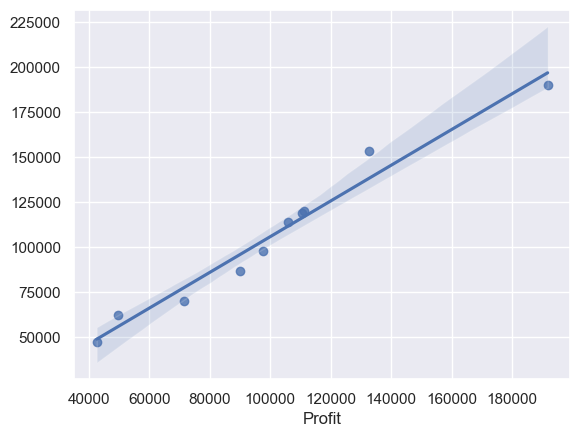

In [69]:
sns.regplot(x=y_test, y=y_pred_gd_test)


# Summary of the Model Building 

- Test accuracy_MLR (test sample 20%) > Test accuracy_MLR (test sample 30%)
- Train accuracy_MLR (test sample 20%) < Train accuracy_MLR (test sample 30%)
- Reguralization method enhanced the accuracy of both Train and Test

In [70]:
row_label=['MLR', 'OLS','Lasso', 'Ridge','ElasticNet', 'Gradient Descent','MLR','OLS' , 'Lasso','Ridge','ElasticNet','GradientDescent']
accuracy_data ={'Test_size' : [0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2], 
                'R2_Train_Accuracy' : [0.965,0.993,0.965,0.96,0.963,0.947,0.932,0.987,0.939,0.939,0.939,0.947],
               'R2_Test_Accuracy' :   [0.899,0.983,0.899,0.90,0.917,0.940,0.983,0.995,0.991,0.991,0.991,0.941], }
accuracy_df =pd.DataFrame(accuracy_data, index =row_label)
accuracy_df

,Test_size,R2_Train_Accuracy,R2_Test_Accuracy
MLR,0.3,0.965,0.899
OLS,0.3,0.993,0.983
Lasso,0.3,0.965,0.899
Ridge,0.3,0.960,0.900
ElasticNet,0.3,0.963,0.917
Gradient Descent,0.3,0.947,0.940
MLR,0.2,0.932,0.983
OLS,0.2,0.987,0.995
Lasso,0.2,0.939,0.991
Ridge,0.2,0.939,0.991


In [71]:
accuracy_df['variance']= abs(accuracy_df['R2_Train_Accuracy'] - accuracy_df['R2_Test_Accuracy'])*100
accuracy_df

,Test_size,R2_Train_Accuracy,R2_Test_Accuracy,variance
MLR,0.3,0.965,0.899,6.6
OLS,0.3,0.993,0.983,1.0
Lasso,0.3,0.965,0.899,6.6
Ridge,0.3,0.960,0.900,6.0
ElasticNet,0.3,0.963,0.917,4.6
Gradient Descent,0.3,0.947,0.940,0.7
MLR,0.2,0.932,0.983,5.1
OLS,0.2,0.987,0.995,0.8
Lasso,0.2,0.939,0.991,5.2
Ridge,0.2,0.939,0.991,5.2


# Observation of the Model Building based on test sample size (0.2, 0.3)

### 1. The variance is minimum in case of Gradient descent.
### 2.  The accuracy is getting better by reducing sample size.
### 3.  In case of smaller sample size, the reguralization is not essential. MLR model is a best fit model for test sample size= 0.2